In [2]:
# ============================== loading libraries ===========================================
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from prettytable import PrettyTable
import random
from scipy.stats import uniform
from sklearn.metrics import roc_curve, auc
from sklearn.learning_curve import validation_curve
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import precision_score, recall_score,roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
import joblib
from sklearn.svm import SVC
from sklearn import svm
from sklearn import linear_model
from scipy import stats
import scikitplot as skplt

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

#import nltk
#nltk.download('stopwords')

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#from gensim.models import KeyedVectors
#model = KeyedVectors.load_word2vec_format(‘GoogleNews-vectors-negative300.bin.gz’,binary=True)

#import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import TruncatedSVD
from sklearn import tree
import graphviz 

#import os
#os.environ["PATH"] += os.pathsep + 'C:/Users/AbhiShek/Anaconda3/Lib/site-packages/graphviz/'

# =============================================================================================

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
fileObject = open("./train_to_file3.pkl",'rb') # we open the file for reading 
X_train = pickle.load(fileObject) # load the object from the file

fileObject = open("./x_test_to_file3.pkl",'rb') # we open the file for reading 
X_test = pickle.load(fileObject) # load the object from the file

fileObject = open("./y_train_to_file3.pkl",'rb') # we open the file for reading 
y_train = pickle.load(fileObject) # load the object from the file

fileObject = open("./y_test_to_file3.pkl",'rb') # we open the file for reading 
y_test = pickle.load(fileObject) # load the object from the file

In [4]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(70000, 11)
(30000, 11)
(70000,)
(30000,)


## BoW

In [5]:
#Appling BoW to fit and transform
count_vect =  CountVectorizer()
bow_NB = count_vect.fit(X_train[:,9])
train_bow_nstd = count_vect.transform(X_train[:,9])
test_bow_nstd = count_vect.transform(X_test[:,9]) 

print("the type of count vectorizer ",type(train_bow_nstd))
print("the number of unique words ", test_bow_nstd.get_shape()[1])

print(train_bow_nstd.shape)
print(test_bow_nstd.shape)
print(y_train.shape)
print(y_test.shape)

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  50158
(70000, 50158)
(30000, 50158)
(70000,)
(30000,)


In [6]:
# Column Standardization of the BoW non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(train_bow_nstd)
train_bow = std_scal.transform(train_bow_nstd)
test_bow = std_scal.transform(test_bow_nstd)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
clf_dtree = tree.DecisionTreeClassifier()
clf_dtree = clf_dtree.fit(train_bow, y_train)
clf_dtree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
parameter = {
        'max_depth': (10, 50, 100, 500),
        'min_samples_split': (5, 10, 50, 100)
    }

gsearch_dt = GridSearchCV(estimator = clf_dtree,
                          param_grid= parameter,
                          cv=3,
                          scoring='f1')
gsearch_dt.fit(train_bow, y_train)

print(gsearch_dt)
results = gsearch_dt.cv_results_

# summarize the results of the grid search
print("\nBest score: ",gsearch_dt.best_score_)
NB_OPTIMAL_clf = gsearch_dt.best_estimator_

best_max_depth_bow = gsearch_dt.best_estimator_.max_depth
print("\nOptimal value of Hyperparameter, max_depth : ",best_max_depth_bow)

best_min_samples_split_bow = gsearch_dt.best_estimator_.min_samples_split
print("\nOptimal value of Hyperparameter, min_samples_split : ",best_min_samples_split_bow)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': (10, 50, 100, 500), 'min_samples_split': (5, 10, 50, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

Best score:  0.9401310501841424

Optimal value of Hyperparameter, max_depth :  10

Optimal value of Hyperparameter, min_samples_split :  100


In [11]:
joblib.dump(results,"results.pkl")

['results.pkl']

In [12]:
results = joblib.load("results.pkl")

In [9]:
results

{'mean_fit_time': array([ 16.3110857 ,  16.64579741,  13.74764299,  12.34962392,
         70.8750759 ,  88.93902961,  75.33119925,  69.67070786,
        135.66119162, 125.24920209, 118.05657617, 113.17246819,
        160.41656399, 156.24411011, 143.60378257, 115.96239297]),
 'std_fit_time': array([0.96940904, 1.01507751, 0.92042447, 0.23798104, 1.0102157 ,
        2.22835542, 3.30128648, 3.03134913, 3.05537011, 3.92056701,
        1.65869858, 2.22295289, 6.50952195, 4.34062752, 9.9097419 ,
        4.74610445]),
 'mean_score_time': array([0.13271681, 0.13827046, 0.12509616, 0.12499436, 0.14242188,
        0.16300591, 0.15599672, 0.17466346, 0.17833591, 0.17233086,
        0.17087579, 0.1633265 , 0.18667348, 0.19000642, 0.21827443,
        0.1632483 ]),
 'std_score_time': array([1.26570569e-02, 3.21237660e-03, 1.13928551e-04, 1.59774052e-05,
        2.52805026e-03, 1.15247754e-02, 1.41400001e-03, 4.02562737e-03,
        6.79366455e-03, 4.91713159e-03, 2.16365238e-02, 1.81356792e-02,
    

In [65]:
X = [10,10,10,10, 50,50,50,50, 100,100,100,100, 500,500,500,500]
Y = [5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,]
Z = results['std_test_score']
print(type(X))
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)
Z_df = pd.DataFrame(Z)
print(type(X_df))

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


In [68]:
X_df.reindex(columns=[*X_df.columns.tolist(), 'Y'],fill_value=1)
X_df['Y']=Y_df.values
X_df.reindex(columns=[*X_df.columns.tolist(), 'Z'],fill_value=1)
X_df['Z']=Z_df.values
X_df.columns = ['X', 'Y', 'Z']
X_df

,X,Y,Z
0,10,5,0.001504
1,10,10,0.001468
2,10,50,0.001364
3,10,100,0.001299
4,50,5,0.001078
5,50,10,0.001597
6,50,50,0.001881
7,50,100,0.000995
8,100,5,0.001640
9,100,10,0.001469


Text(0.5, 1.0, 'Test Score')

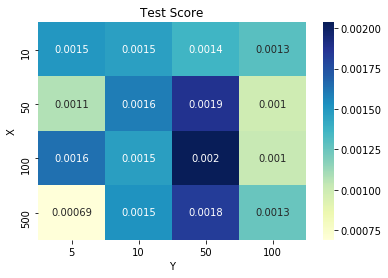

In [71]:
plot_data = X_df.pivot("X", "Y", "Z")
ax = sns.heatmap(plot_data, annot=True, cmap="YlGnBu")
ax.set_title('Test Score')

In [73]:
X = [10,10,10,10, 50,50,50,50, 100,100,100,100, 500,500,500,500]
Y = [5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,]
Z = results['std_train_score']
print(type(X))
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)
Z_df = pd.DataFrame(Z)
print(type(X_df))
X_df.reindex(columns=[*X_df.columns.tolist(), 'Y'],fill_value=1)
X_df['Y']=Y_df.values
X_df.reindex(columns=[*X_df.columns.tolist(), 'Z'],fill_value=1)
X_df['Z']=Z_df.values
X_df.columns = ['X', 'Y', 'Z']
X_df

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


,X,Y,Z
0,10,5,0.000229
1,10,10,0.000178
2,10,50,0.000349
3,10,100,0.000353
4,50,5,0.000083
5,50,10,0.000160
6,50,50,0.000984
7,50,100,0.001343
8,100,5,0.000395
9,100,10,0.000606


Text(0.5, 1.0, 'Train Score')

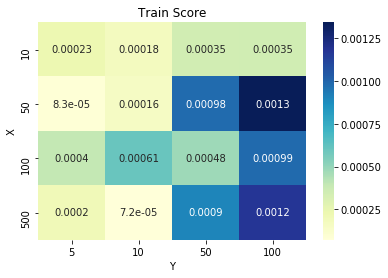

In [74]:
plot_data = X_df.pivot("X", "Y", "Z")
ax = sns.heatmap(plot_data, annot=True, cmap="YlGnBu")
ax.set_title('Train Score')

## Decision Tree on BoW with Best Parameters

In [35]:
clf_dtree_best = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=100)
clf_dtree_best.fit(train_bow, y_train)

y_pred_test = clf_dtree_best.predict(test_bow)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc_best = auc(false_positive_rate, true_positive_rate)

joblib.dump(clf_dtree_best,"clf_dtree_best.pkl")
joblib.dump(y_pred_test,"y_pred_test.pkl")
joblib.dump(roc_auc_best,"roc_auc_best.pkl")

['roc_auc_best.pkl']

In [77]:
clf_dtree_best = joblib.load("clf_dtree_best.pkl")
y_pred_test = joblib.load("y_pred_test.pkl")
roc_auc_best = joblib.load("roc_auc_best.pkl")
roc_auc_best

0.5894844147283171

In [37]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_bow = confusion_matrix(y_test, y_pred_test)
cm_bow

array([[  802,  3298],
       [  431, 25469]], dtype=int64)

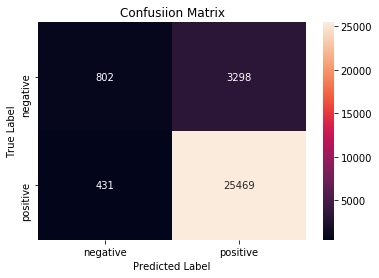

In [38]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_bow, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [40]:
y_pred_train_proba = clf_dtree_best.predict_proba(train_bow)
y_pred_test_proba = clf_dtree_best.predict_proba(test_bow)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


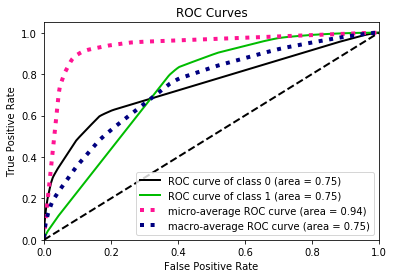

In [41]:
#Plotting ROC curve over Train Data
skplt.metrics.plot_roc_curve(y_train,y_pred_train_proba)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


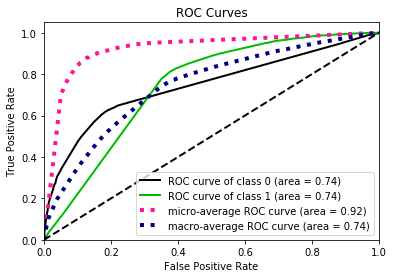

In [42]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,y_pred_test_proba)

In [49]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=20):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.feature_importances_, feature_names))[:n]
    topn_class2 = sorted(zip(classifier.feature_importances_, feature_names))[-n:]
    #print(dict(zip(iris_pd.columns, clf.feature_importances_)))
    
    print("Top 20 important features:\n ")
    for coef, feat in reversed(topn_class2):
        print (coef,"--> ", feat)


most_informative_feature_for_binary_classification(count_vect, clf_dtree_best)

Top 20 important features:
 
0.13675912498792062 -->  not
0.07565956141379283 -->  great
0.07212151659906803 -->  worst
0.06566557770479665 -->  disappointed
0.06231627614015801 -->  was
0.0468568030225928 -->  money
0.04382670380998059 -->  awful
0.042428174003224954 -->  terrible
0.034679778079664686 -->  horrible
0.031638564349793195 -->  waste
0.027899457864880444 -->  best
0.026820522891220576 -->  disappointing
0.025529565497729605 -->  delicious
0.02261988297114902 -->  bad
0.021128847276721156 -->  and
0.02033381360079511 -->  disappointment
0.018377359046007857 -->  find
0.017325097116191065 -->  good
0.017150603179352856 -->  you
0.014484344991899347 -->  love


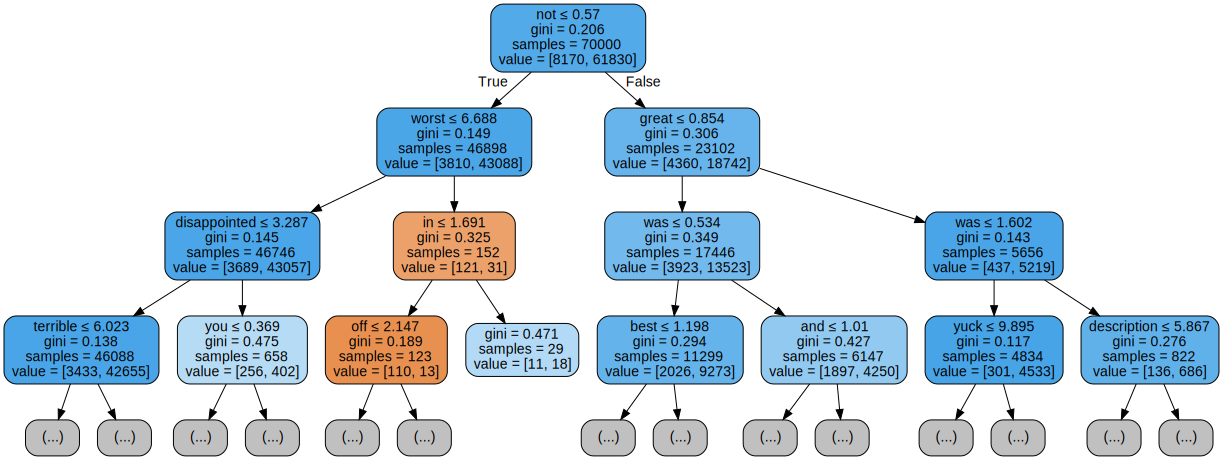

In [50]:
dot_data = tree.export_graphviz(clf_dtree_best, out_file=None, 
                      feature_names=count_vect.get_feature_names(),  
                      filled=True, rounded=True, 
                      max_depth = 3,          
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## TDIDF

In [78]:
#tf-idf on train data
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1)) #considering only uni-gram as I was getting memory error
train_tfidf_nstd = tf_idf_vect.fit_transform(X_train[:,9]) #sparse matrix
test_tfidf_nstd = tf_idf_vect.transform(X_test[:,9])
print(train_tfidf_nstd.shape)
print(test_tfidf_nstd.shape)

(70000, 50158)
(30000, 50158)


In [79]:
# Column Standardization of the tfidf non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(train_tfidf_nstd)
train_tfidf = std_scal.transform(train_tfidf_nstd)
test_tfidf = std_scal.transform(test_tfidf_nstd)

In [80]:
clf_dtree_tfidf = tree.DecisionTreeClassifier()
clf_dtree_tfidf = clf_dtree_tfidf.fit(train_tfidf, y_train)
clf_dtree_tfidf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:
parameter = {
        'max_depth': (10, 50, 100, 500),
        'min_samples_split': (5, 10, 50, 100)
    }

gsearch_dt_tfidf = GridSearchCV(estimator = clf_dtree_tfidf,
                          param_grid= parameter,
                          cv=3,
                          scoring='f1')
gsearch_dt_tfidf.fit(train_tfidf, y_train)

print(gsearch_dt_tfidf)
results_tfidf = gsearch_dt_tfidf.cv_results_

# summarize the results of the grid search
print("\nBest score: ",gsearch_dt_tfidf.best_score_)
NB_OPTIMAL_clf_tfidf = gsearch_dt_tfidf.best_estimator_

best_max_depth_tfidf = gsearch_dt_tfidf.best_estimator_.max_depth
print("\nOptimal value of Hyperparameter, max_depth : ",best_max_depth_tfidf)

best_min_samples_split_tfidf = gsearch_dt_tfidf.best_estimator_.min_samples_split
print("\nOptimal value of Hyperparameter, min_samples_split : ",best_min_samples_split_tfidf)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': (10, 50, 100, 500), 'min_samples_split': (5, 10, 50, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

Best score:  0.9406953146056071

Optimal value of Hyperparameter, max_depth :  10

Optimal value of Hyperparameter, min_samples_split :  100


In [83]:
joblib.dump(results_tfidf,"results_tfidf.pkl")

['results_tfidf.pkl']

In [84]:
results_tfidf = joblib.load("results_tfidf.pkl")
results_tfidf

{'mean_fit_time': array([ 23.21834135,  22.94935322,  21.895353  ,  21.05104415,
        101.5016168 , 111.03950222, 109.17370653, 126.04858645,
        198.12915691, 182.98127143, 164.11317499, 152.27093101,
        236.86794758, 248.61721786, 193.44268179, 197.97029328]),
 'std_fit_time': array([ 0.62632641,  0.66681435,  0.47643973,  0.44130969,  0.72555859,
        12.72471449, 12.31967425, 14.23149979, 17.76721227, 17.63056785,
        12.44513891,  1.89577197,  8.31369432, 16.71417197,  9.30418931,
         2.26798842]),
 'mean_score_time': array([0.19200667, 0.1943326 , 0.19500383, 0.19233147, 0.21832633,
        0.26770425, 0.23200425, 0.24234343, 0.27033631, 0.25466291,
        0.23966281, 0.23534139, 0.25633709, 0.25499527, 0.22766511,
        0.23599792]),
 'std_score_time': array([0.00489834, 0.00329913, 0.00293429, 0.00579326, 0.01388622,
        0.0880107 , 0.02031939, 0.01810829, 0.01692974, 0.03493051,
        0.00872895, 0.0103956 , 0.02071435, 0.01639093, 0.00419114,


In [85]:
X = [10,10,10,10, 50,50,50,50, 100,100,100,100, 500,500,500,500]
Y = [5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,]
Z = results['std_train_score']
print(type(X))
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)
Z_df = pd.DataFrame(Z)
print(type(X_df))
X_df.reindex(columns=[*X_df.columns.tolist(), 'Y'],fill_value=1)
X_df['Y']=Y_df.values
X_df.reindex(columns=[*X_df.columns.tolist(), 'Z'],fill_value=1)
X_df['Z']=Z_df.values
X_df.columns = ['X', 'Y', 'Z']
X_df

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


,X,Y,Z
0,10,5,0.000229
1,10,10,0.000178
2,10,50,0.000349
3,10,100,0.000353
4,50,5,0.000083
5,50,10,0.000160
6,50,50,0.000984
7,50,100,0.001343
8,100,5,0.000395
9,100,10,0.000606


Text(0.5, 1.0, 'Train Score')

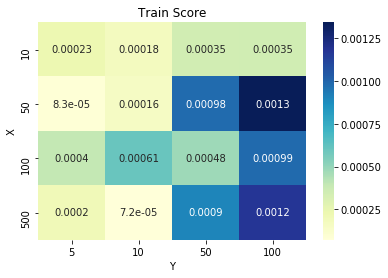

In [86]:
plot_data = X_df.pivot("X", "Y", "Z")
ax = sns.heatmap(plot_data, annot=True, cmap="YlGnBu")
ax.set_title('Train Score')

In [87]:
X = [10,10,10,10, 50,50,50,50, 100,100,100,100, 500,500,500,500]
Y = [5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,]
Z = results['std_test_score']
print(type(X))
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)
Z_df = pd.DataFrame(Z)
print(type(X_df))
X_df.reindex(columns=[*X_df.columns.tolist(), 'Y'],fill_value=1)
X_df['Y']=Y_df.values
X_df.reindex(columns=[*X_df.columns.tolist(), 'Z'],fill_value=1)
X_df['Z']=Z_df.values
X_df.columns = ['X', 'Y', 'Z']
X_df

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


,X,Y,Z
0,10,5,0.001504
1,10,10,0.001468
2,10,50,0.001364
3,10,100,0.001299
4,50,5,0.001078
5,50,10,0.001597
6,50,50,0.001881
7,50,100,0.000995
8,100,5,0.001640
9,100,10,0.001469


Text(0.5, 1.0, 'Test Score')

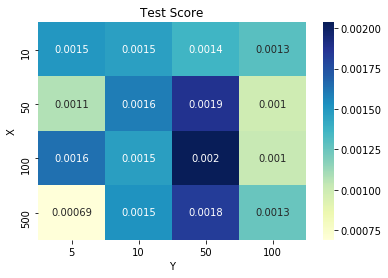

In [88]:
plot_data = X_df.pivot("X", "Y", "Z")
ax = sns.heatmap(plot_data, annot=True, cmap="YlGnBu")
ax.set_title('Test Score')

## Decision Tree on TFIDF with Best Parameters

In [10]:
clf_dtree_tfidf_best = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=5)
clf_dtree_tfidf_best.fit(train_tfidf, y_train)

y_pred_test_tfidf = clf_dtree_tfidf_best.predict(test_tfidf)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test_tfidf)
roc_auc_tfidf_best = auc(false_positive_rate, true_positive_rate)

joblib.dump(clf_dtree_tfidf_best,"clf_dtree_tfidf_best.pkl")
joblib.dump(y_pred_test_tfidf,"y_pred_test_tfidf.pkl")
joblib.dump(roc_auc_tfidf_best,"roc_auc_tfidf_best.pkl")

['roc_auc_tfidf_best.pkl']

In [16]:
clf_dtree_tfidf_best = joblib.load("clf_dtree_tfidf_best.pkl")
y_pred_test_tfidf = joblib.load("y_pred_test_tfidf.pkl")
roc_auc_tfidf_best = joblib.load("roc_auc_tfidf_best.pkl")
roc_auc_tfidf_best

0.580360203408984

In [17]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_tfidf = confusion_matrix(y_test, y_pred_test_tfidf)
cm_tfidf

array([[  718,  3382],
       [  373, 25527]], dtype=int64)

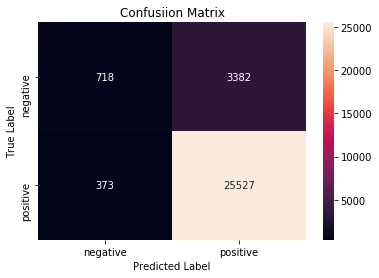

In [18]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_tfidf, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [20]:
y_pred_train_proba_tfidf = clf_dtree_tfidf_best.predict_proba(train_tfidf)
y_pred_test_proba_tfidf = clf_dtree_tfidf_best.predict_proba(test_tfidf)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


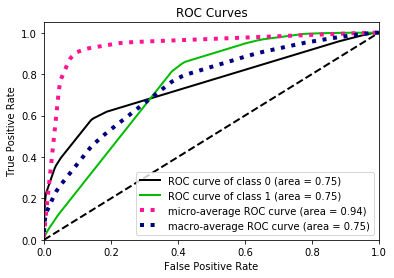

In [21]:
#Plotting ROC curve over Train Data
skplt.metrics.plot_roc_curve(y_train,y_pred_train_proba_tfidf)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


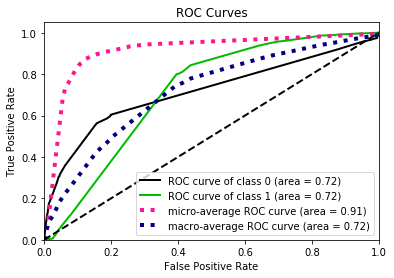

In [22]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,y_pred_test_proba_tfidf)

In [24]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=20):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.feature_importances_, feature_names))[:n]
    topn_class2 = sorted(zip(classifier.feature_importances_, feature_names))[-n:]
    #print(dict(zip(iris_pd.columns, clf.feature_importances_)))
    
    print("Top 20 important features:\n ")
    for coef, feat in reversed(topn_class2):
        print (coef,"--> ", feat)


most_informative_feature_for_binary_classification(tf_idf_vect, clf_dtree_tfidf_best)

Top 20 important features:
 
0.14057903019407447 -->  not
0.06801588980901073 -->  was
0.06736153811238069 -->  great
0.06716416874074672 -->  worst
0.05425180173271436 -->  disappointed
0.04404892349196213 -->  awful
0.0394325782602613 -->  terrible
0.03430715220625825 -->  money
0.02895438236575219 -->  best
0.0288257685212685 -->  horrible
0.027650118010705358 -->  waste
0.025572538557227752 -->  delicious
0.022483611636000985 -->  bad
0.021530291947656512 -->  disappointment
0.018453866245291606 -->  disappointing
0.016281934544395527 -->  did
0.016266072762773025 -->  you
0.013295538243558292 -->  find
0.011720581691207339 -->  love
0.01111688871246896 -->  would


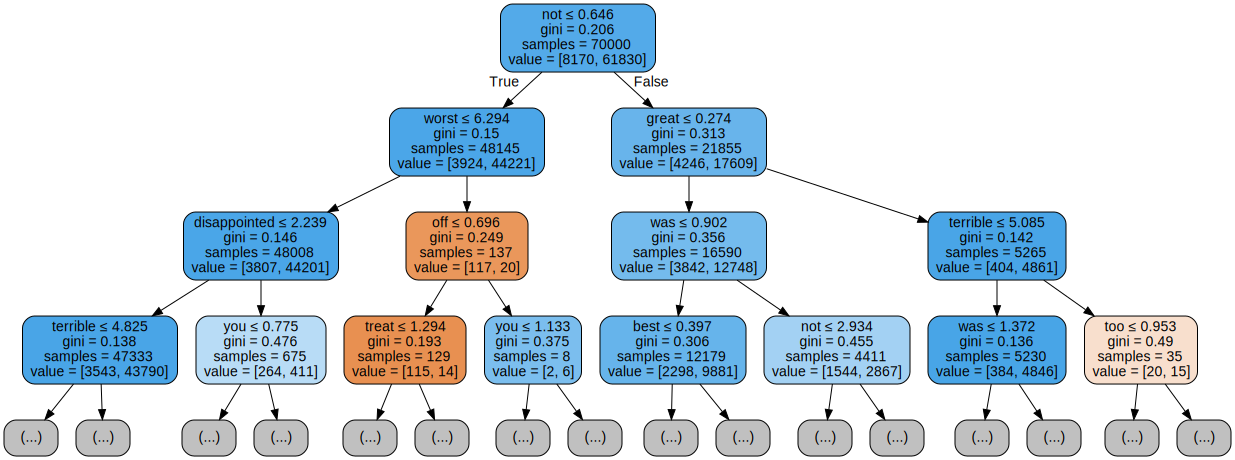

In [70]:
dot_data = tree.export_graphviz(clf_dtree_tfidf_best, out_file=None, 
                      feature_names=count_vect.get_feature_names(),  
                      filled=True, rounded=True, 
                      max_depth = 3,          
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## avgW2W

In [91]:
fileObject = open("./final_to_file3.pkl",'rb') # we open the file for reading 
final = pickle.load(fileObject) # load the object from the file

In [92]:
#w2v
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())
    
print(type(list_of_sent))
print(final['CleanedText'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

<class 'list'>
witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [93]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [94]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
#print(len(sent_vectors[0]))
print(type(sent_vectors))

100000
<class 'list'>


In [95]:
# create design matrix X and target vector y
X = np.array(sent_vectors[::]) # end index is exclusive
y = np.array(final['Score']) # showing you two ways of indexing a pandas df

In [96]:
X_train_nstd = X[0:70000:1]
X_test_nstd = X[70000:100000:1]

y_train_nstd = y[0:70000:1]
y_test_nstd =y[70000:100000:1]

print(X_train_nstd.shape)
print(X_test_nstd.shape)
print(y_train_nstd.shape)
print(y_test_nstd.shape)

(70000, 50)
(30000, 50)
(70000,)
(30000,)


In [97]:
# Column Standardization of the tfidf non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(X_train_nstd)
train_avgw2v = std_scal.transform(X_train_nstd)
test_avgw2v = std_scal.transform(X_test_nstd)

## tfidf-W-W2V

In [98]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(final['CleanedText'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [99]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in (list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [100]:
print(len(tfidf_sent_vectors))
print(np.shape(tfidf_sent_vectors))
print(type(tfidf_sent_vectors))

100000
(100000, 50)
<class 'list'>


In [101]:
# create design matrix X and target vector y
X = np.array(tfidf_sent_vectors[::]) # end index is exclusive
y = np.array(final['Score']) # showing you two ways of indexing a pandas df

In [102]:
#taking 40K data into consideration
X_train_nstd = X[0:70000:1]
X_test_nstd = X[70000:100000:1]

y_train_nstd = y[0:70000:1]
y_test_nstd =y[70000:100000:1]

print(X_train_nstd.shape)
print(X_test_nstd.shape)
print(y_train_nstd.shape)
print(y_test_nstd.shape)

(70000, 50)
(30000, 50)
(70000,)
(30000,)


In [103]:
# Column Standardization of the tfidf non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(X_train_nstd)
train_tfidfww2v = std_scal.transform(X_train_nstd)
test_tfidfww2v = std_scal.transform(X_test_nstd)

## Decision tree on avgw2v

In [104]:
clf_dtree_avgw2v = tree.DecisionTreeClassifier()
clf_dtree_avgw2v = clf_dtree_avgw2v.fit(train_avgw2v, y_train)
clf_dtree_avgw2v

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [105]:
parameter = {
        'max_depth': (10, 50, 100, 500),
        'min_samples_split': (5, 10, 50, 100)
    }

gsearch_dt_avgw2v = GridSearchCV(estimator = clf_dtree_avgw2v,
                          param_grid= parameter,
                          cv=3,
                          scoring='f1')
gsearch_dt_avgw2v.fit(train_avgw2v, y_train)

print(gsearch_dt_avgw2v)
results_avgw2v = gsearch_dt_avgw2v.cv_results_

# summarize the results of the grid search
print("\nBest score: ",gsearch_dt_avgw2v.best_score_)
NB_OPTIMAL_clf_avgw2v = gsearch_dt_avgw2v.best_estimator_

best_max_depth_avgw2v = gsearch_dt_avgw2v.best_estimator_.max_depth
print("\nOptimal value of Hyperparameter, max_depth : ",best_max_depth_avgw2v)

best_min_samples_split_avgw2v = gsearch_dt_avgw2v.best_estimator_.min_samples_split
print("\nOptimal value of Hyperparameter, min_samples_split : ",best_min_samples_split_avgw2v)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': (10, 50, 100, 500), 'min_samples_split': (5, 10, 50, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

Best score:  0.9339276150267604

Optimal value of Hyperparameter, max_depth :  10

Optimal value of Hyperparameter, min_samples_split :  100


In [106]:
joblib.dump(results_avgw2v,"results_avgw2v.pkl")

['results_avgw2v.pkl']

In [107]:
results_avgw2v = joblib.load("results_avgw2v.pkl")
results_avgw2v

{'mean_fit_time': array([ 9.67353535,  9.64587641,  9.60054286,  9.66454252, 15.72911191,
        15.92145435, 15.54411936, 15.25178615, 15.72878416, 15.68577886,
        15.42479499, 15.09579301, 15.71378469, 15.79211775, 15.38444805,
        15.23078354]),
 'std_fit_time': array([0.0521318 , 0.01124283, 0.02904043, 0.09989732, 0.02941685,
        0.2005213 , 0.05197705, 0.02513229, 0.09296609, 0.04558629,
        0.06668414, 0.02271469, 0.01791504, 0.1870347 , 0.08803648,
        0.20450028]),
 'mean_score_time': array([0.03633261, 0.03665423, 0.03766783, 0.03633356, 0.04400015,
        0.04200157, 0.04099997, 0.04067755, 0.04233281, 0.04266715,
        0.04166071, 0.04132549, 0.04232748, 0.04300618, 0.04200149,
        0.04133272]),
 'std_score_time': array([4.71034627e-04, 9.37212143e-04, 2.35600671e-03, 4.86936587e-04,
        1.41411111e-03, 1.36730278e-06, 8.10467325e-07, 4.68070019e-04,
        4.71595499e-04, 4.72890535e-04, 4.65492410e-04, 1.23963243e-03,
        4.75154943e-

In [108]:
X = [10,10,10,10, 50,50,50,50, 100,100,100,100, 500,500,500,500]
Y = [5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,]
Z = results['std_train_score']
print(type(X))
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)
Z_df = pd.DataFrame(Z)
print(type(X_df))
X_df.reindex(columns=[*X_df.columns.tolist(), 'Y'],fill_value=1)
X_df['Y']=Y_df.values
X_df.reindex(columns=[*X_df.columns.tolist(), 'Z'],fill_value=1)
X_df['Z']=Z_df.values
X_df.columns = ['X', 'Y', 'Z']
X_df

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


,X,Y,Z
0,10,5,0.000229
1,10,10,0.000178
2,10,50,0.000349
3,10,100,0.000353
4,50,5,0.000083
5,50,10,0.000160
6,50,50,0.000984
7,50,100,0.001343
8,100,5,0.000395
9,100,10,0.000606


Text(0.5, 1.0, 'Train Score')

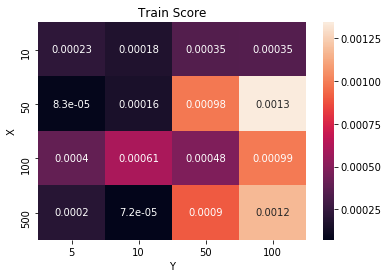

In [110]:
plot_data = X_df.pivot("X", "Y", "Z")
ax = sns.heatmap(plot_data, annot=True)
ax.set_title('Train Score')

In [111]:
X = [10,10,10,10, 50,50,50,50, 100,100,100,100, 500,500,500,500]
Y = [5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,]
Z = results['std_train_score']
print(type(X))
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)
Z_df = pd.DataFrame(Z)
print(type(X_df))
X_df.reindex(columns=[*X_df.columns.tolist(), 'Y'],fill_value=1)
X_df['Y']=Y_df.values
X_df.reindex(columns=[*X_df.columns.tolist(), 'Z'],fill_value=1)
X_df['Z']=Z_df.values
X_df.columns = ['X', 'Y', 'Z']
X_df

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


,X,Y,Z
0,10,5,0.000229
1,10,10,0.000178
2,10,50,0.000349
3,10,100,0.000353
4,50,5,0.000083
5,50,10,0.000160
6,50,50,0.000984
7,50,100,0.001343
8,100,5,0.000395
9,100,10,0.000606


Text(0.5, 1.0, 'Test Score')

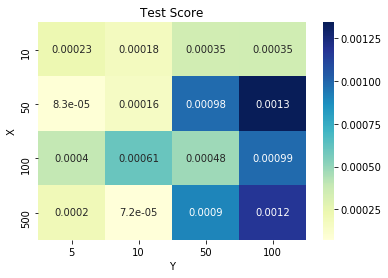

In [112]:
plot_data = X_df.pivot("X", "Y", "Z")
ax = sns.heatmap(plot_data, annot=True, cmap="YlGnBu")
ax.set_title('Test Score')

## Decision tree n avgW2V with best parameters

In [49]:
clf_dtree_avgw2v_best = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=100)
clf_dtree_avgw2v_best.fit(train_avgw2v, y_train)

y_pred_test_avgw2v = clf_dtree_avgw2v_best.predict(test_avgw2v)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test_avgw2v)
roc_auc_avgw2v_best = auc(false_positive_rate, true_positive_rate)

joblib.dump(clf_dtree_avgw2v_best,"clf_dtree_avgw2v_best.pkl")
joblib.dump(y_pred_test_avgw2v,"y_pred_test_avgw2v.pkl")
joblib.dump(roc_auc_avgw2v_best,"roc_auc_avgw2v_best.pkl")

['roc_auc_avgw2v_best.pkl']

In [50]:
clf_dtree_avgw2v_best = joblib.load("clf_dtree_avgw2v_best.pkl")
y_pred_test_avgw2v = joblib.load("y_pred_test_avgw2v.pkl")
roc_auc_avgw2v_best = joblib.load("roc_auc_avgw2v_best.pkl")
roc_auc_avgw2v_best

0.623541764761277

In [51]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_avgw2v = confusion_matrix(y_test, y_pred_test_avgw2v)
cm_avgw2v

array([[ 1181,  2919],
       [ 1061, 24839]], dtype=int64)

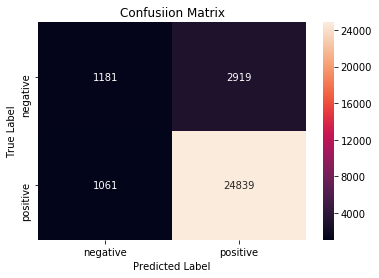

In [52]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_avgw2v, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
y_pred_train_proba_avgw2v = clf_dtree_avgw2v_best.predict_proba(train_avgw2v)
y_pred_test_proba_avgw2v = clf_dtree_avgw2v_best.predict_proba(test_avgw2v)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


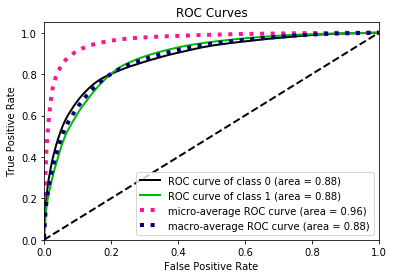

In [54]:
#Plotting ROC curve over Train Data
skplt.metrics.plot_roc_curve(y_train,y_pred_train_proba_avgw2v)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


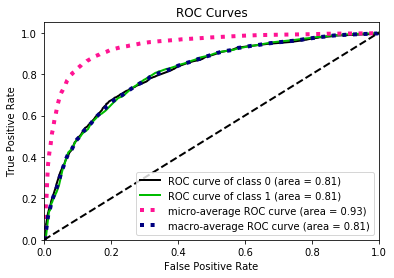

In [55]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,y_pred_test_proba_avgw2v)

## Decision tree on avgW2V

In [114]:
clf_dtree_tfidfww2v = tree.DecisionTreeClassifier()
clf_dtree_tfidfww2v = clf_dtree_tfidfww2v.fit(train_tfidfww2v, y_train)
clf_dtree_tfidfww2v

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
parameter = {
        'max_depth': (10, 50, 100, 500),
        'min_samples_split': (5, 10, 50, 100)
    }

gsearch_dt_tfidfww2v = GridSearchCV(estimator = clf_dtree_tfidfww2v,
                          param_grid= parameter,
                          cv=3,
                          scoring='f1')
gsearch_dt_tfidfww2v.fit(train_tfidfww2v, y_train)

print(gsearch_dt_tfidfww2v)
results_tfidfww2v = gsearch_dt_tfidfww2v.cv_results_

# summarize the results of the grid search
print("\nBest score: ",gsearch_dt_tfidfww2v.best_score_)
NB_OPTIMAL_clf_tfidfww2v = gsearch_dt_tfidfww2v.best_estimator_

best_max_depth_tfidfww2v = gsearch_dt_tfidfww2v.best_estimator_.max_depth
print("\nOptimal value of Hyperparameter, max_depth : ",best_max_depth_avgw2v)

best_min_samples_split_tfidfww2v = gsearch_dt_tfidfww2v.best_estimator_.min_samples_split
print("\nOptimal value of Hyperparameter, min_samples_split : ",best_min_samples_split_tfidfww2v)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': (10, 50, 100, 500), 'min_samples_split': (5, 10, 50, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

Best score:  0.9325425934731919

Optimal value of Hyperparameter, max_depth :  10

Optimal value of Hyperparameter, min_samples_split :  100


In [116]:
joblib.dump(results_tfidfww2v,"results_tfidfww2v.pkl")

['results_tfidfww2v.pkl']

In [117]:
results_tfidfww2v = joblib.load("results_tfidfww2v.pkl")
results_tfidfww2v

{'mean_fit_time': array([11.4971749 , 10.17852147, 11.56268986, 10.60651414, 18.02674754,
        20.75989413, 22.00454299, 19.30385288, 20.54829375, 19.843069  ,
        19.61579458, 18.9970003 , 20.56338533, 19.86815532, 19.46697593,
        19.08710965]),
 'std_fit_time': array([0.95208276, 0.25577852, 0.23045816, 0.84617185, 0.42394321,
        0.39921845, 1.54595274, 0.26827836, 0.36000856, 0.62303393,
        0.34115417, 0.30680656, 1.15234423, 0.42790657, 0.33383946,
        0.50872494]),
 'mean_score_time': array([0.04000092, 0.03933922, 0.04466605, 0.03700034, 0.04567258,
        0.05366858, 0.06066028, 0.05200203, 0.05100083, 0.05066737,
        0.05233264, 0.04901385, 0.04966966, 0.05266627, 0.04967101,
        0.05032818]),
 'std_score_time': array([0.00216333, 0.00170099, 0.00880744, 0.00081585, 0.00249328,
        0.00590545, 0.01083399, 0.00141422, 0.0021602 , 0.00124632,
        0.00758384, 0.00354946, 0.00170332, 0.00205568, 0.00189078,
        0.0017106 ]),
 'param_ma

In [118]:
X = [10,10,10,10, 50,50,50,50, 100,100,100,100, 500,500,500,500]
Y = [5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,]
Z = results['std_train_score']
print(type(X))
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)
Z_df = pd.DataFrame(Z)
print(type(X_df))
X_df.reindex(columns=[*X_df.columns.tolist(), 'Y'],fill_value=1)
X_df['Y']=Y_df.values
X_df.reindex(columns=[*X_df.columns.tolist(), 'Z'],fill_value=1)
X_df['Z']=Z_df.values
X_df.columns = ['X', 'Y', 'Z']
X_df

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


,X,Y,Z
0,10,5,0.000229
1,10,10,0.000178
2,10,50,0.000349
3,10,100,0.000353
4,50,5,0.000083
5,50,10,0.000160
6,50,50,0.000984
7,50,100,0.001343
8,100,5,0.000395
9,100,10,0.000606


Text(0.5, 1.0, 'Train Score')

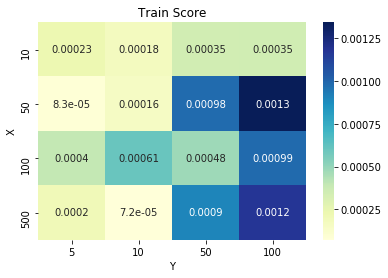

In [119]:
plot_data = X_df.pivot("X", "Y", "Z")
ax = sns.heatmap(plot_data, annot=True, cmap="YlGnBu")
ax.set_title('Train Score')

In [120]:
X = [10,10,10,10, 50,50,50,50, 100,100,100,100, 500,500,500,500]
Y = [5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,5, 10, 50, 100,]
Z = results['std_train_score']
print(type(X))
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)
Z_df = pd.DataFrame(Z)
print(type(X_df))
X_df.reindex(columns=[*X_df.columns.tolist(), 'Y'],fill_value=1)
X_df['Y']=Y_df.values
X_df.reindex(columns=[*X_df.columns.tolist(), 'Z'],fill_value=1)
X_df['Z']=Z_df.values
X_df.columns = ['X', 'Y', 'Z']
X_df

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


,X,Y,Z
0,10,5,0.000229
1,10,10,0.000178
2,10,50,0.000349
3,10,100,0.000353
4,50,5,0.000083
5,50,10,0.000160
6,50,50,0.000984
7,50,100,0.001343
8,100,5,0.000395
9,100,10,0.000606


Text(0.5, 1.0, 'Test Score')

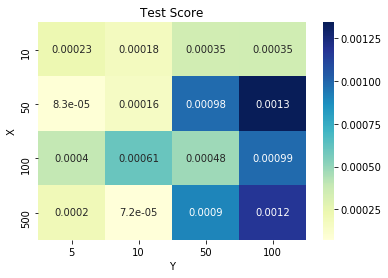

In [121]:
plot_data = X_df.pivot("X", "Y", "Z")
ax = sns.heatmap(plot_data, annot=True, cmap="YlGnBu")
ax.set_title('Test Score')

## Decision tree on tfidf-W-W2V with best parameters

In [59]:
clf_dtree_tfidfww2v_best = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=100)
clf_dtree_tfidfww2v_best.fit(train_tfidfww2v, y_train)

y_pred_test_tfidfww2v = clf_dtree_tfidfww2v_best.predict(test_tfidfww2v)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test_tfidfww2v)
roc_auc_tfidfww2v_best = auc(false_positive_rate, true_positive_rate)

joblib.dump(clf_dtree_tfidfww2v_best,"clf_dtree_tfidfww2v_best.pkl")
joblib.dump(y_pred_test_tfidfww2v,"y_pred_test_tfidfww2v.pkl")
joblib.dump(roc_auc_tfidfww2v_best,"roc_auc_tfidfww2v_best.pkl")

['roc_auc_tfidfww2v_best.pkl']

In [60]:
clf_dtree_tfidfww2v_best = joblib.load("clf_dtree_tfidfww2v_best.pkl")
y_pred_test_tfidfww2v = joblib.load("y_pred_test_tfidfww2v.pkl")
roc_auc_tfidfww2v_best = joblib.load("roc_auc_tfidfww2v_best.pkl")
roc_auc_tfidfww2v_best

0.5872798756945099

In [61]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_tfidfww2v = confusion_matrix(y_test, y_pred_test_tfidfww2v)
cm_tfidfww2v

array([[  855,  3245],
       [  880, 25020]], dtype=int64)

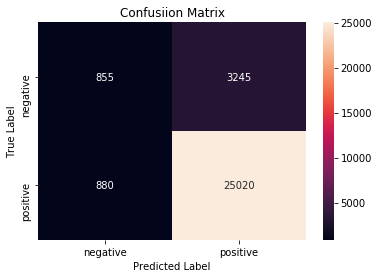

In [62]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_tfidfww2v, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [63]:
y_pred_train_proba_tfidfww2v = clf_dtree_tfidfww2v_best.predict_proba(train_tfidfww2v)
y_pred_test_proba_tfidfww2v = clf_dtree_tfidfww2v_best.predict_proba(test_tfidfww2v)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


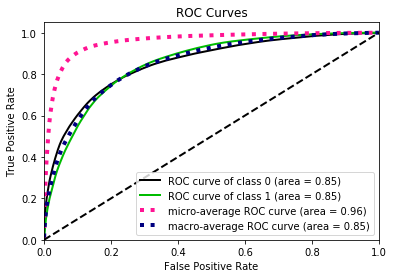

In [64]:
#Plotting ROC curve over Train Data
skplt.metrics.plot_roc_curve(y_train,y_pred_train_proba_tfidfww2v)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


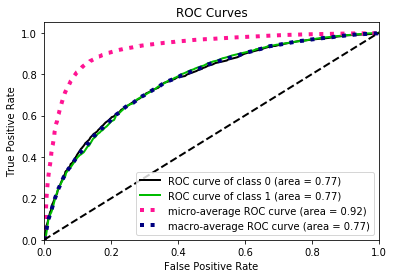

In [65]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,y_pred_test_proba_tfidfww2v)

In [78]:
x = PrettyTable()
x.field_names = ["Paramters/Models","BoW", "TFIDF", "AvgW2V", "TFIDF-W-W2V"]
#x.field_names = ["Kernel = Linear"]

x.add_row(["max_depth : ",best_max_depth_bow,best_max_depth_tfidf,best_max_depth_avgw2v,best_max_depth_tfidfww2v ])
x.add_row(["min_samples_split ",best_min_samples_split_bow,best_min_samples_split_tfidf,best_min_samples_split_avgw2v,best_min_samples_split_tfidfww2v])
x.add_row(["AUC Score: ",roc_auc_best, roc_auc_tfidf_best, roc_auc_avgw2v_best, roc_auc_tfidfww2v_best])

print(x)

+--------------------+--------------------+-------------------+-------------------+--------------------+
|  Paramters/Models  |        BoW         |       TFIDF       |       AvgW2V      |    TFIDF-W-W2V     |
+--------------------+--------------------+-------------------+-------------------+--------------------+
|    max_depth :     |         10         |         10        |         10        |         10         |
| min_samples_split  |        100         |         5         |        100        |        100         |
|    AUC Score:      | 0.5894844147283171 | 0.580360203408984 | 0.623541764761277 | 0.5872798756945099 |
+--------------------+--------------------+-------------------+-------------------+--------------------+
